In [1]:
from __future__  import print_function, division
import pandas as pd
import numpy as np
import os
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
1.citibike csv file from Jan 2016, download and move data to PUIDATA
2.Simple bash commands can be run by preceding them with !, 
  but more complex command lines with variable arguments need to be build as strng and run with os.system
"""

def getCitiBikeCSV(datestring):
    """
    looks for existing files, download a file if none is there, unzips it, moves it
    """
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")): 
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201606'
getCitiBikeCSV(datestring)

file in place, you can continue


In [86]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# i.e. df['starttime'] or as attributes: df.starttime. 
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [87]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [88]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year','usertype'], axis=1, inplace=True)

In [89]:
df.head(5)

,tripduration,date
0,1470,2016-06-01 00:00:18
1,229,2016-06-01 00:00:20
2,344,2016-06-01 00:00:21
3,1120,2016-06-01 00:00:28
4,229,2016-06-01 00:00:53


In [90]:
mean = df.tripduration.mean()

### Lets plot the number of trips per day

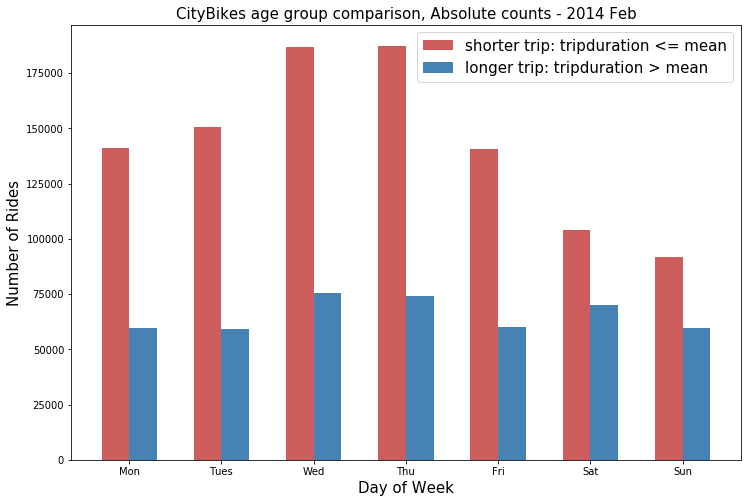

In [91]:
fig = pl.figure(figsize(12,8))

norm_s = 1
short = ((df['date'][df['tripduration'] <= mean].
  groupby([df['date'].dt.weekday]).count()) / norm_s)

norm_l = 1
long = ((df['date'][df['tripduration'] > mean].
       groupby([df['date'].dt.weekday]).count()) / norm_l)

ind = np.arange(7)
width = 0.3 
plt.bar(ind, short, width, label='shorter trip: tripduration <= mean', color='IndianRed',)
plt.bar(ind + width, long, width, color='SteelBlue', label='longer trip: tripduration > mean')

plt.ylabel('Number of Rides',fontsize=15)
plt.xlabel('Day of Week',fontsize=15)
plt.title('CityBikes age group comparison, Absolute counts - 2014 Feb',fontsize=15)
plt.xticks(ind + width / 2,('Mon', 'Tues', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.legend(fontsize=15)

## Figure 1: Distribution of tripduration in June 2016, absolute counts

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of subscriber, and that of customer, i.e. devide them by the total number of rides for that usertype.(errorbars are normalized too!)

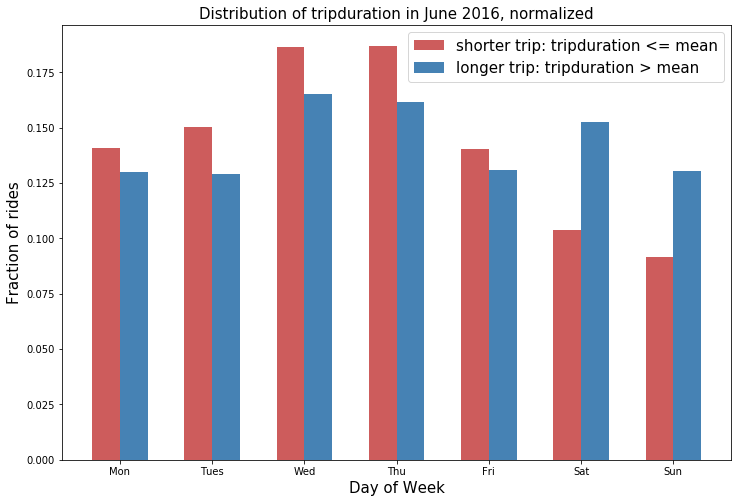

In [93]:
fig = pl.figure(figsize(12,8))
ind = np.arange(7)
width = 0.3 

counts_s = df.date[df.tripduration <= mean].groupby([df.date.dt.weekday]).count()
norm_s = counts_s.sum()
error_s = np.sqrt(counts_s)
short = ((counts_s) / norm_s)
plt.bar(ind, short, width, color='IndianRed', label='shorter trip: tripduration <= mean')

counts_l = df.date[df.tripduration > mean].groupby([df.date.dt.weekday]).count()
norm_l = counts_l.sum()
long = ((counts_l) / norm_l)
plt.bar(ind + width, long, width, color='SteelBlue', label='longer trip: tripduration > mean')

plt.ylabel('Fraction of rides',fontsize=15)
plt.xlabel('Day of Week',fontsize=15)
plt.title('Distribution of tripduration in June 2016, normalized',fontsize=15)
plt.xticks(ind + width / 2,('Mon', 'Tues', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.legend(fontsize=15)

## Figure 2: Distribution of trips by tripduration in June 2016, normalized